In [27]:
#Supressing Warnings

import warnings 
warnings.filterwarnings("ignore")

In [28]:
# importing packages into the code
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
###########################################################
#uploading files to Google colab
#This section is copied from the following link: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=vz-jH8T_Uk2c

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
###########################################################
# reading the Haberman's cancer survival dataset
cancer_survival = pd.read_csv("haberman_survival.csv")

Saving haberman_survival.csv to haberman_survival (1).csv
User uploaded file "haberman_survival.csv" with length 3124 bytes


In [29]:
#printing dataset's rank
print(cancer_survival.shape)

(306, 4)


In [30]:
# Printing the columns available in the dataset
print(cancer_survival.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [31]:
# printing the values of statuses available in the dataset
print(cancer_survival['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


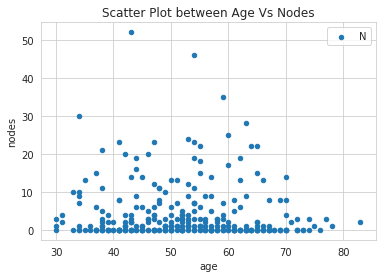

In [32]:
# plotting a scatter plot between age and nodes
cancer_survival.plot(kind='scatter', x='age', y='nodes')
plt.title("Scatter Plot between Age Vs Nodes")
plt.legend("Nodes Vs Ages")
plt.show()

Observations:
1. Positive auxillary nodes are high for the patients age range between 40-65 years
2. Outliers(2 points) are present in the data
3. There is not much clarification between age vs nodes scatter plot


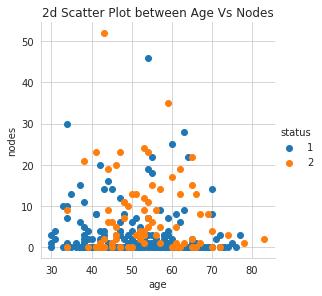

In [33]:
sns.set_style('whitegrid')
sns.FacetGrid(cancer_survival, hue='status', height=4).map(plt.scatter, "age", "nodes").add_legend()
plt.title("2d Scatter Plot between Age Vs Nodes")
plt.show()

Observations:
1. Unable to differentiate the survival status variable using this 2d scatter plot between age Vs positive auxilary nodes

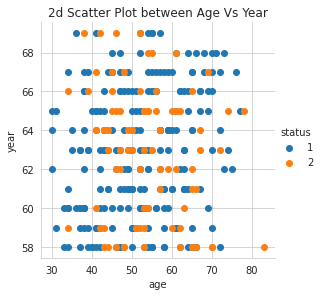

In [34]:
plt.close('all')
sns.set_style('whitegrid')
sns.FacetGrid(cancer_survival, hue='status', height=4).map(plt.scatter, "age", "year").add_legend()
plt.title("2d Scatter Plot between Age Vs Year")
plt.show()

Observations:
1. unable to differentiate status using 2d-plot between age Vs year

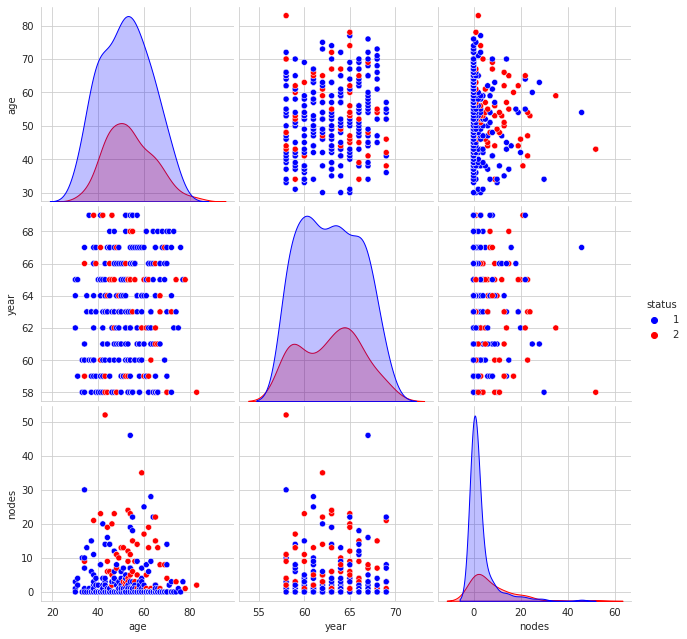

In [35]:
plt.close('all')
color_dict = {1:'blue', 2:'red'}
sns.set_style('whitegrid')
sns.pairplot(cancer_survival, hue='status', palette=color_dict, height=3)
plt.show()

Observations:
1. None of the 2d-scater plots have clear descrimination of status between the variables
2. Seems like variable 'nodes' follow the normal distribution
3. Patients with less number of nodes are more survived
4. Patient's operated in 1960's are more survived


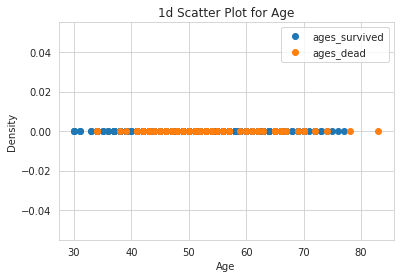

In [36]:
# Plotting 1d scatter plots
plt.close('all')
status_survived = cancer_survival.loc[cancer_survival['status'] == 1]
status_dead = cancer_survival.loc[cancer_survival['status'] == 2]
plt.plot(status_survived['age'], np.zeros_like(status_survived['age']), 'o', label='ages_survived')
plt.plot(status_dead['age'], np.zeros_like(status_dead['age']), 'o', label='ages_dead')
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("1d Scatter Plot for Age")
plt.legend()
plt.show()

Observations:
Data points are over lapped, status can't be clearly seperated

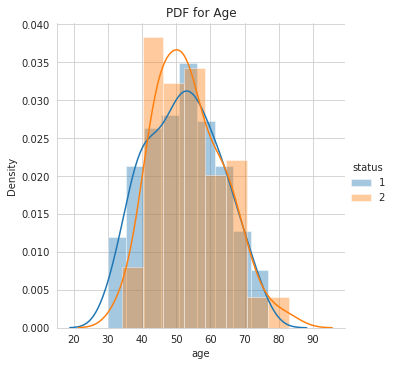

In [37]:
plt.close('all')
sns.FacetGrid(cancer_survival, hue='status',height=5).map(sns.distplot, 'age').add_legend()
plt.title("PDF for Age")
plt.show()

Observations:
1. Seems like PDF of status (status=2) follows Guassian distribution
2. Patients aged between 40-60 years are more dead

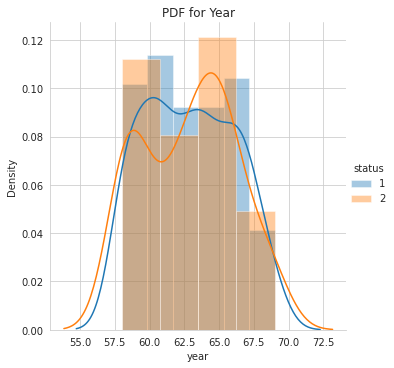

In [38]:
plt.close('all')
sns.FacetGrid(cancer_survival, hue='status',height=5).map(sns.distplot, 'year').add_legend()
plt.title("PDF for Year")
plt.show()

Observations:
1. None of the distributions follow Normal distribution
2. Patients operated between 1963-1965 are more dead
3. Patients operated between 1959-1961 are more survived

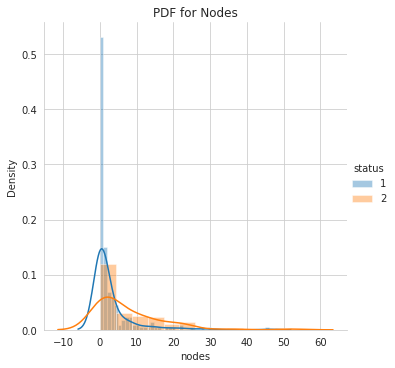

In [39]:
plt.close('all')
sns.FacetGrid(cancer_survival, hue='status',height=5).map(sns.distplot, 'nodes').add_legend()
plt.title("PDF for Nodes")
plt.show()

Observations:
1. Seems that status of survival and status of dead are follow normal distribution
2. Patients with 2 positive auxilary nodes are more survived compared to dead
3. Patients with more than 20 positive auxilary nodes are more dead

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


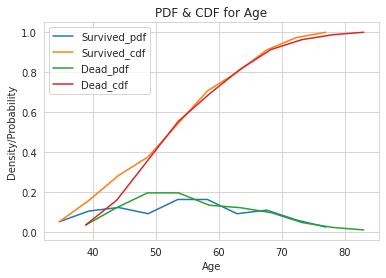

In [40]:
counts, bin_edges = np.histogram(status_survived['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='Survived_pdf');
plt.plot(bin_edges[1:], cdf, label='Survived_cdf')

counts, bin_edges = np.histogram(status_dead['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='Dead_pdf');
plt.plot(bin_edges[1:], cdf, label='Dead_cdf')
plt.xlabel("Age")
plt.ylabel("Density/Probability")
plt.legend()
plt.title("PDF & CDF for Age")
plt.show()

Observations:
1. Patients aged less than 38 years are always survived 

In [41]:
# Calculating mean, Variance and standard deviation
print("Mean of Patients_Survived_nodes:")
print(np.mean(status_survived['nodes']))
print("Std-Dev of Patients_Survived_nodes:")
print(np.std(status_survived['nodes']))

print("Mean of Patients_Dead_nodes:")
print(np.mean(status_dead['nodes']))
print("Std-Dev of Patients_Dead_nodes:")
print(np.std(status_dead['nodes']))

Mean of Patients_Survived_nodes:
2.7911111111111113
Std-Dev of Patients_Survived_nodes:
5.857258449412131
Mean of Patients_Dead_nodes:
7.45679012345679
Std-Dev of Patients_Dead_nodes:
9.128776076761632


Observations:
1. Patients with less than 3 nodes are more likely to survive
2. Patients with more than 7 nodes are more likely to dead

In [42]:
#Calculating Median, Quantiles, Percentiles, IQR
print("Median of nodes for survival patients:")
print(np.median(status_survived['nodes']))
print("Median of nodes for dead patients:")
print(np.median(status_dead['nodes']))

print("Quantiles of nodes for survival patients:")
print(np.percentile(status_survived["nodes"],np.arange(0, 100, 25)))
print("Quantiles of nodes for dead patients:")
print(np.percentile(status_dead["nodes"],np.arange(0, 100, 25)))

print("90% survival patients nodes")
print(np.percentile(status_survived["nodes"],90))
print("90% dead patients nodes")
print(np.percentile(status_dead["nodes"],90))

from statsmodels import robust
print("MAD of nodes for survived patients:")
print(robust.mad(status_survived["nodes"]))
print("MAD of nodes for dead patients:")
print(robust.mad(status_dead["nodes"]))


Median of nodes for survival patients:
0.0
Median of nodes for dead patients:
4.0
Quantiles of nodes for survival patients:
[0. 0. 0. 3.]
Quantiles of nodes for dead patients:
[ 0.  1.  4. 11.]
90% survival patients nodes
8.0
90% dead patients nodes
20.0
MAD of nodes for survived patients:
0.0
MAD of nodes for dead patients:
5.930408874022408


Observations:
1. Patients with more than four nodes are dead with 75% probability
2. Patients with less than three nodes are survived with 100% probability

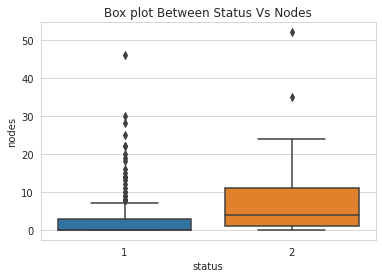

In [43]:
#Box plot
sns.boxplot(x='status',y='nodes', data=cancer_survival)
plt.title("Box plot Between Status Vs Nodes")
plt.show()

Observations:
1. Inter quartile range of nodes for survived patients: 0-3
2. Inter quartile range of nodes for dead patients: 1-11

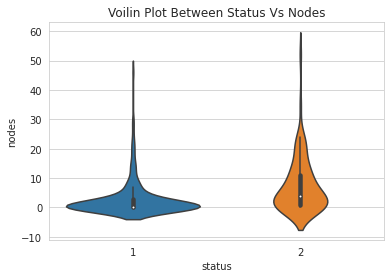

In [44]:
#Violin Plot
sns.violinplot(x="status", y="nodes", data=cancer_survival, size=8)
plt.title("Voilin Plot Between Status Vs Nodes")
plt.show()

Summary of the analysis:
1. Patients with less than 3 nodes have 100% probability to survive
2. Patients with less than 8 nodes have 90% probability to survive
3. Patients with less than 20 nodes have 90% probability to dead
4. Patients aged less than 38 years are 100% survived
